# **Laboratory 2: Exploring Class Boundaries**
**Authors**: Noemi Cicala, Mazzini Matteo

In this lab, we will explore how different models classify data and identify the parameters that directly impact their performance. By modifying these parameters, we can observe how the models adapt, altering their decision boundaries and reshaping class regions. For this purpose, we will work with a toy binary classification dataset to demonstrate these concepts.

Import packages

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

Create a binary toy dataset

In [53]:
# Generate toy binary classification problem with noise using make_classsification()
np.random.seed(42)
X, y = make_classification(
    n_features=2,                # Two-dimensional data
    n_redundant=0,               # No redundant features
    n_informative=2,             # Two informative features
    n_clusters_per_class=1,      # One cluster per class
    n_samples=200,               # Number of data points
    class_sep=1,                 # Lower class separation to increase overlap                
    random_state=42
)

# Define plot limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Linear Boundaries
We begin by exploring models that  separate data  by a straight line (or a hyperplane in higher dimensions), resulting in a linear decision boundary. These models are particularly effective when the relationship between the input features and class labels is inherently linear. The models we focus on are:
- Logistic Regression
- Linear SVM
- LDA

### Logistic Regresion
This statistical model predicts the probability of a binary outcome based on a linear combination of input features, identifying a linear boundary by maximizing classification likelihood. Class output is determined by the probability threshold, which defaults to 0.5. Increasing the threshold shifts the boundary toward the positive class, shrinking its region, while decreasing it expands the positive class region

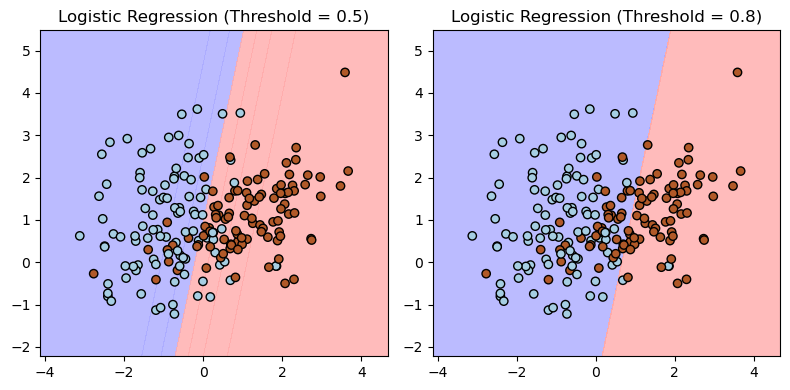

In [54]:
model = LogisticRegression()
model.fit(X, y)
# Predict probabilities for the meshgrid
probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Standard threshold (0.5)
Z_default = probs.reshape(xx.shape)
# Custom threshold (0.8)
Z_custom = (probs >= 0.8).astype(int)
Z_custom = Z_custom.reshape(xx.shape)
# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
titles = ["Logistic Regression (Threshold = 0.5)", "Logistic Regression (Threshold = 0.8)"]
boundaries = [Z_default, Z_custom]

for i, (ax, Z) in enumerate(zip(axes, boundaries)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF","#FFAAAA" ]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(titles[i])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


### Linear SVM
This model identifies a linear boundary that maximizes the margin between classes, focusing on support vectors. The decision boundary is influenced by the $C$parameter, which balances margin width and classification errors. A high $C$ creates a boundary tightly fitted to the data, potentially overfitting, while a low $C$ widens the margin, allowing more misclassifications and improving generalization.

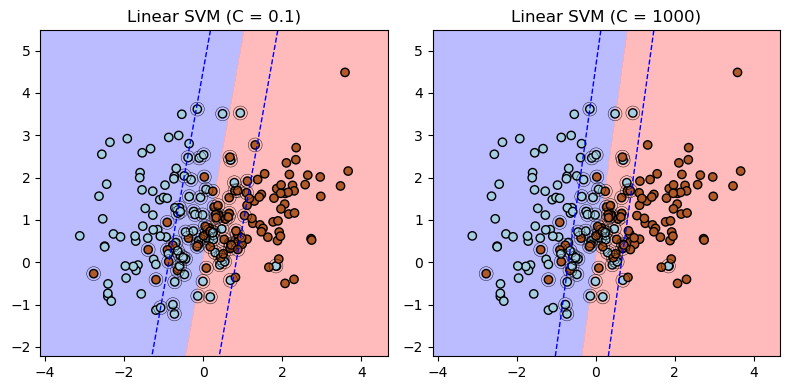

In [55]:
# Train Linear SVM models with different C values
svm_C1 = SVC(kernel="linear", C=0.1)
svm_C100 = SVC(kernel="linear", C=1000)
svm_C1.fit(X, y)
svm_C100.fit(X, y)

# Predict decision boundaries and margins
Z_C1 = svm_C1.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_C100 = svm_C100.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries with margins
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
titles = ["Linear SVM (C = 0.1)", "Linear SVM (C = 1000)"]
boundaries = [Z_C1, Z_C100]

for i, (ax, Z, model) in enumerate(zip(axes, boundaries, [svm_C1, svm_C100])):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=ListedColormap([ "#AAAAFF","#FFAAAA"]))
    # Add margin lines
    ax.contour(xx, yy, Z, levels=[-1, 1], colors="blue", linewidths=1, linestyles="dashed")
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=.3)
    ax.set_title(titles[i])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


### LDA
This model identifies a linear boundary by modeling class distributions and assuming shared covariance. The decision boundary is influenced by class priors, which weight the importance of each class. Higher priors for one class shift the boundary toward the less probable class, expanding the dominant class region, while equal priors create a balanced separation.

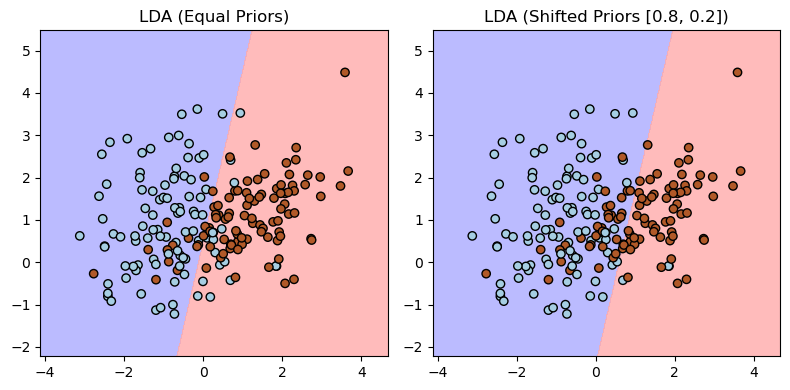

In [56]:
# Train LDA models with different priors
lda_prior_equal = LinearDiscriminantAnalysis()  # Equal priors since default is based on class frequencies and we have half data in each
lda_prior_shifted = LinearDiscriminantAnalysis(priors=[0.8, 0.2])  # Shifted priors
lda_prior_equal.fit(X, y)
lda_prior_shifted.fit(X, y)

# Predict decision boundaries
Z_equal = lda_prior_equal.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_shifted = lda_prior_shifted.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries with margins
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
titles = ["LDA (Equal Priors)", "LDA (Shifted Priors [0.8, 0.2])"]
boundaries = [Z_equal, Z_shifted]

for i, (ax, Z, model) in enumerate(zip(axes, boundaries, [lda_prior_equal, lda_prior_shifted])):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=ListedColormap(["#AAAAFF","#FFAAAA" ]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(titles[i])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

# Non Linear Boundaries
We now focus on models capable of creating non-linear boundaries between classes. These models are often more effective than linear models when the relationship between variables is non-linear. However, their increased complexity can lead to overfitting if not carefully managed. The models include:
- Naive Bayes
- Quadratic Discriminant Analysis (QDA)
- SVM with RBF and Polynomial kernels
- K-Nearest Neighbors (KNN)
- Decision Trees (CART)
- Multilayer Perceptron (MLP)

### Naive Bayes
This model predicts class membership by modeling feature distributions independently for each class. The decision boundary is influenced by class priors, which adjust the weighting of each class. Higher priors for one class shift the boundary toward the less likely class, enlarging the dominant class region, while equal priors lead to a balanced separation.

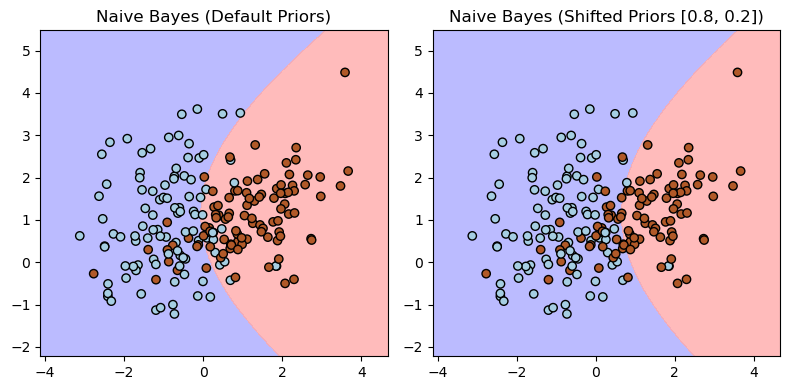

In [57]:
# Train Naive Bayes models with different priors
nb_prior_default = GaussianNB()  # Default priors (based on class frequencies)
nb_prior_shifted = GaussianNB(priors=[0.8, 0.2])  # Shifted priors
nb_prior_default.fit(X, y)
nb_prior_shifted.fit(X, y)

# Predict decision boundaries
Z_default = nb_prior_default.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
Z_shifted = nb_prior_shifted.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
titles = ["Naive Bayes (Default Priors)", "Naive Bayes (Shifted Priors [0.8, 0.2])"]
boundaries = [Z_default, Z_shifted]

for i, (ax, Z, title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0.5, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

### QDA
This model identifies a quadratic boundary by modeling class distributions separately and allowing distinct covariances for each class. The decision boundary is influenced by class priors, which weight the importance of each class. Higher priors for one class shift the boundary toward the less probable class, expanding the dominant class region, while equal priors create a balanced separation.

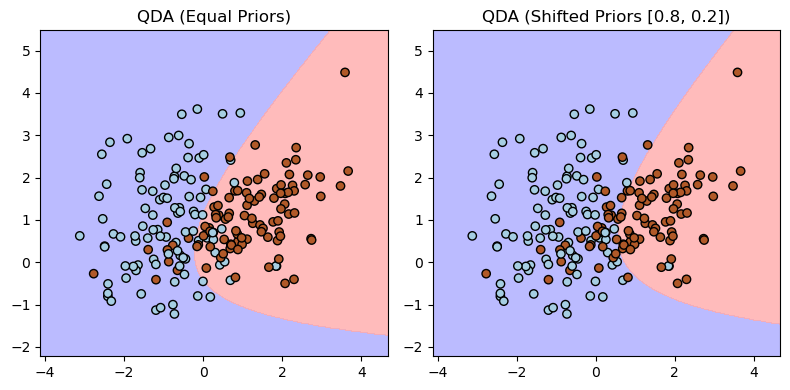

In [58]:
# Train QDA models with different priors
qda_prior_equal = QuadraticDiscriminantAnalysis()  # Default priors (based on class frequencies)
qda_prior_shifted = QuadraticDiscriminantAnalysis(priors=[0.8, 0.2])  # Shifted priors
qda_prior_equal.fit(X, y)
qda_prior_shifted.fit(X, y)

# Predict decision boundaries
Z_equal = qda_prior_equal.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_shifted = qda_prior_shifted.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
titles = ["QDA (Equal Priors)", "QDA (Shifted Priors [0.8, 0.2])"]
boundaries = [Z_equal, Z_shifted]

for i, (ax, Z, model) in enumerate(zip(axes, boundaries, [qda_prior_equal, qda_prior_shifted])):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(titles[i])
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


### Kernel SVMs



This model identifies a non-linear boundary by transforming data into higher-dimensional spaces using kernel functions, such as polynomial or RBF. In the transformed space, the model applies a linear classifier, which allows it to effectively separate classes that are not linearly separable in the original feature space.

- Polynomial Kernel: The boundary takes a global curved shape, whose complexity depends on the kernel degree. Higher degrees create more intricate, wavy boundaries, while lower degrees yield smoother ones. However, polynomial kernels are restricted to boundaries that can be represented by polynomial functions.
- RBF Kernel: The boundary forms localized, smooth, circular, or elliptical regions around data points, adapting to clusters in the input space. Unlike polynomial kernels, RBF kernels can model arbitrarily complex decision boundaries, making them more versatile for capturing intricate patterns.

Parameters Influencing Decision Boundaries:
The complexity of the decision boundary is influenced by two key parameters:

- $gamma$ for RBF kernels: Controls the influence of each data point. Higher gamma values result in tighter, highly localized boundaries, increasing the risk of overfitting. Lower gamma values create broader, smoother boundaries that generalize better.
- Degree ($d$) for polynomial kernels: Determines the polynomial order. Higher degrees allow more complex, wavy boundaries, while lower degrees result in simpler, smoother shapes.
Additionally, as in the linear svm the C parameter affects the decision boundary for both kernels by controlling the trade-off between margin size and misclassification.
- High C: Produces a tighter boundary that focuses on minimizing classification errors, but it risks overfitting the data.
- Low C: Creates a wider margin, tolerating more misclassifications to improve generalization.

Polynomial SVM

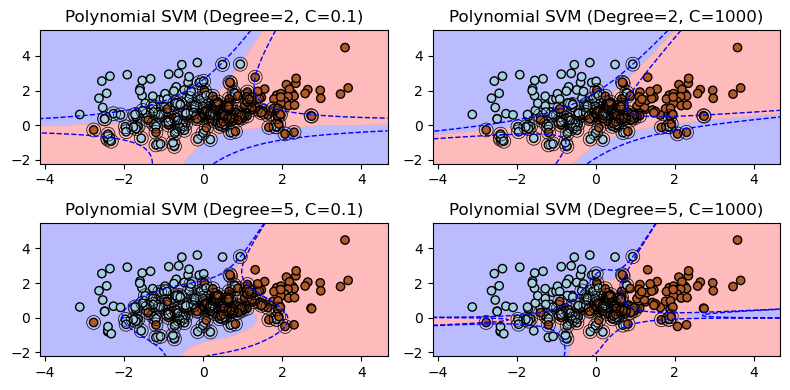

In [59]:
# Train Polynomial SVM models with different degrees and C values
models = [
    SVC(kernel="poly", degree=2, C=0.1),
    SVC(kernel="poly", degree=2, C=1000),
    SVC(kernel="poly", degree=5, C=0.1),
    SVC(kernel="poly", degree=5, C=1000),
]

titles = [
    "Polynomial SVM (Degree=2, C=0.1)",
    "Polynomial SVM (Degree=2, C=1000)",
    "Polynomial SVM (Degree=5, C=0.1)",
    "Polynomial SVM (Degree=5, C=1000)",
]

boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Add margin lines
    ax.contour(xx, yy, Z, levels=[-1, 1], colors="blue", linewidths=1, linestyles="dashed")
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=0.5)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


RBF-SVM

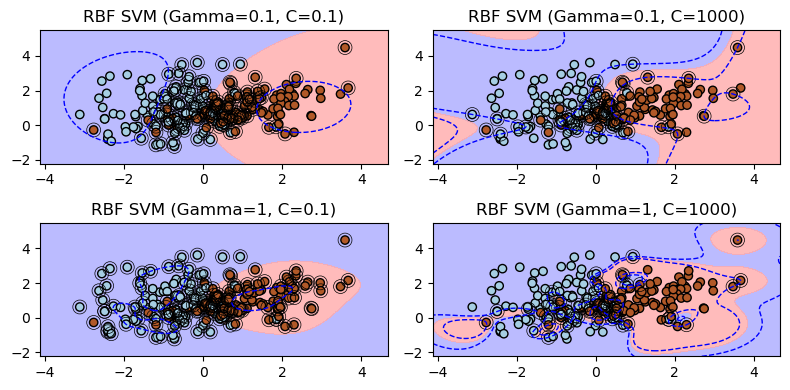

In [60]:
# Train RBF SVM models with different gamma and C values
models = [
    SVC(kernel="rbf", gamma=0.1, C=0.1),
    SVC(kernel="rbf", gamma=0.1, C=1000),
    SVC(kernel="rbf", gamma=1, C=0.1),
    SVC(kernel="rbf", gamma=1, C=1000),
]

titles = [
    "RBF SVM (Gamma=0.1, C=0.1)",
    "RBF SVM (Gamma=0.1, C=1000)",
    "RBF SVM (Gamma=1, C=0.1)",
    "RBF SVM (Gamma=1, C=1000)",
]

boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z > 0, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Add margin lines
    ax.contour(xx, yy, Z, levels=[-1, 1], colors="blue", linewidths=1, linestyles="dashed")
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    # Highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', linewidths=0.5)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


### K-NN
This model identifies non-linear decision boundaries based on the distribution of the training data and classifies points using the k-nearest neighbors. The decision boundary is shaped by several factors, including the value of $k$, the distance metric, and the weighting of neighbors.

Effect of $k$ (Number of Neighbors):
- A smaller $k$ creates highly irregular, jagged boundaries that closely follow the training data, making the model sensitive to noise and prone to overfitting. $k$ =1 classifies al the points as in the training dataset, thereofre no training error and overfitted model.
- A larger $k$ results in smoother, more generalized boundaries, as decisions are based on a larger set of neighbors, reducing sensitivity to noise but potentially underfitting.

The choice of distance metric determines how neighbors are defined and influences the shape of decision regions:
- Euclidean Distance: Forms circular or spherical regions around data points.
- Manhattan Distance: Forms more rectangular and less smoother regions.
- Other Metrics: Metrics like Minkowski or cosine similarity result in other varied boundary shapes.

$k$ = 1 and $k$ = 5 with Euclidean Distance

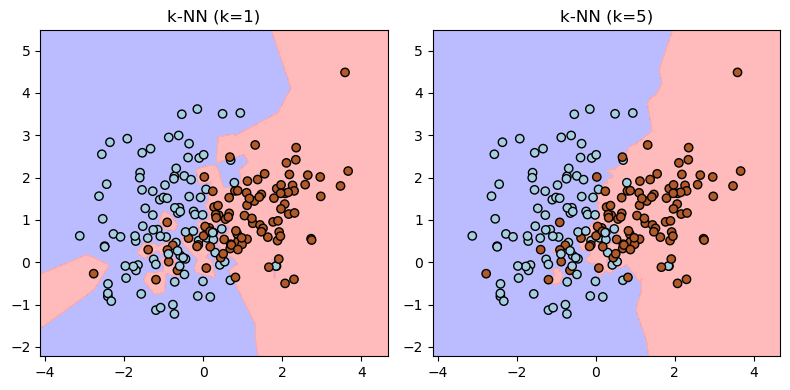

In [61]:
# Train k-NN models with different k values
models = [
    KNeighborsClassifier(n_neighbors=1),  # k=1
    KNeighborsClassifier(n_neighbors=5),  # k=5
]

titles = [
    "k-NN (k=1)",
    "k-NN (k=5)",
]

boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


$k$ = 1 and $k$ = 5 with Manhattan Distance

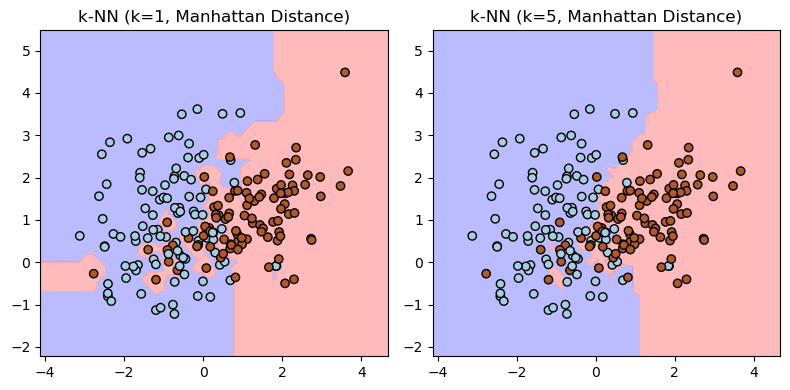

In [62]:
# Train k-NN models with Manhattan distance and different k values
models = [
    KNeighborsClassifier(n_neighbors=1, metric='manhattan'),  # k=1
    KNeighborsClassifier(n_neighbors=5, metric='manhattan'),  # k=5
]

titles = [
    "k-NN (k=1, Manhattan Distance)",
    "k-NN (k=5, Manhattan Distance)",
]

boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()


### CART Decision Trees
This model identifies axis-aligned, rectangular boundaries by recursively splitting the feature space into regions based on feature thresholds. The decision boundary is influenced by the depth of the tree and the impurity measure used for splitting.

Tree Depth:
- A shallow tree results in fewer splits, creating coarse, simple boundaries that may underfit the data.
- A deeper tree introduces more splits, creating finer, more detailed regions. However, overly deep trees can overfit the training data, leading to highly fragmented boundaries.

Impurity Measures:
- Gini Index prioritizes splits that maximize class separation with a focus on majority class dominance.
- Entropy prioritizes splits that maximize information gain, often creating more balanced splits.

Default and  reduced depth with Gini impurity

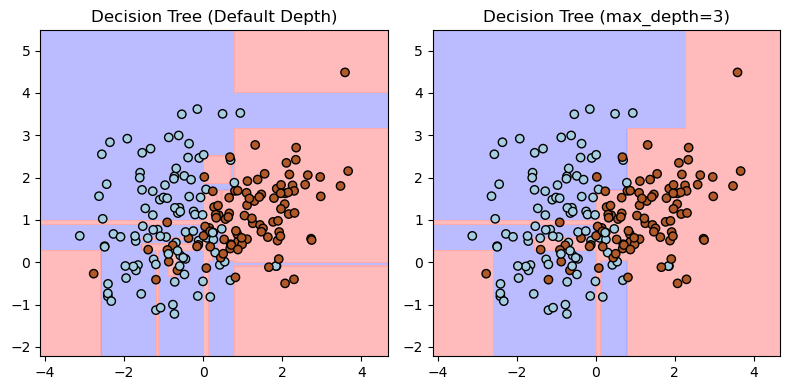

In [63]:
# Train Decision Tree models with default depth and max_depth=4
models = [
    DecisionTreeClassifier(),  # Default depth
    DecisionTreeClassifier(max_depth=4),  # max_depth=4
]

titles = [
    "Decision Tree (Default Depth)",
    "Decision Tree (max_depth=3)",
]

# Generate decision boundaries
boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()



Default and  reduced depth with entropy impurity

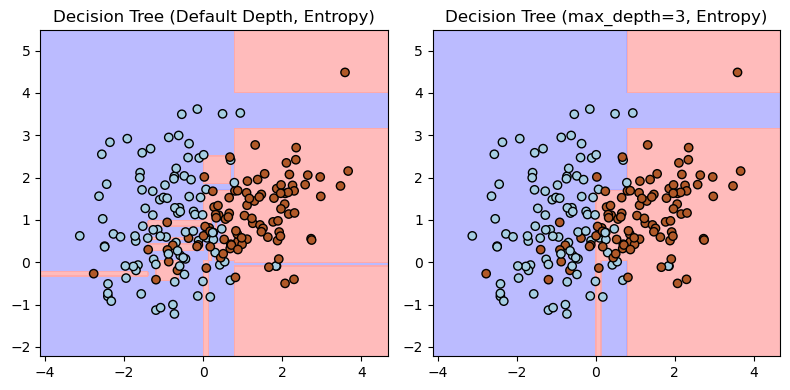

In [64]:
# Train Decision Tree models with entropy (alternative impurity measure)
models = [
    DecisionTreeClassifier(criterion="entropy"),  # Default depth with entropy
    DecisionTreeClassifier(criterion="entropy", max_depth=4),  # max_depth=4 with entropy
]

titles = [
    "Decision Tree (Default Depth, Entropy)",
    "Decision Tree (max_depth=3, Entropy)",
]

# Generate decision boundaries
boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

### MLP with one hidden layer
This model's decision boundaries are shaped by the number of neurons in the hidden layer and the activation function, as these determine how the feature space is partitioned into regions. According to the Universal Approximation Theorem, an MLP with one hidden layer and a non-linear activation function can approximate any continuous function, allowing it to represent arbitrarily complex boundaries given enough neurons.

Number of Neurons:
- Fewer neurons: Result in simple, coarse boundaries that may underfit, as the model lacks sufficient capacity to capture complex patterns.
- More neurons: Allow the model to create complex, fine-grained boundaries, potentially matching highly intricate patterns. However, excessive neurons can lead to overfitting, where the model learns noise in the training data.

Activation Functions:
- ReLU: Produces piecewise linear boundaries defined by combinations of linear hyperplanes, leading to sharp, angular decision regions.
- Tanh: Generates smooth, non-linear boundaries with gradual transitions, making it better suited for capturing complex, smooth patterns.

MLP with hidden 300 and 10 hidden neurons and Relu activation function

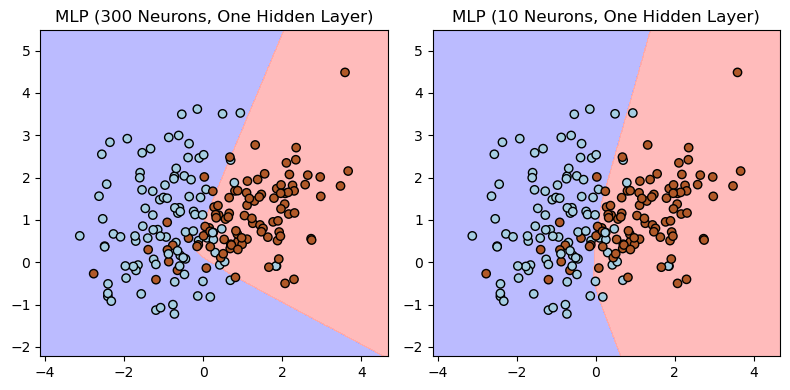

In [65]:
# Train MLP models with one hidden layer
models = [
    MLPClassifier(hidden_layer_sizes=(300,), max_iter=2000, random_state=42),  # 300 neurons
    MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=42),  # 10 neurons
]

titles = [
    "MLP (300 Neurons, One Hidden Layer)",
    "MLP (10 Neurons, One Hidden Layer)",
]

# Generate decision boundaries
boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

MLP with hidden 300 and 10 hidden neurons and tanh activation function

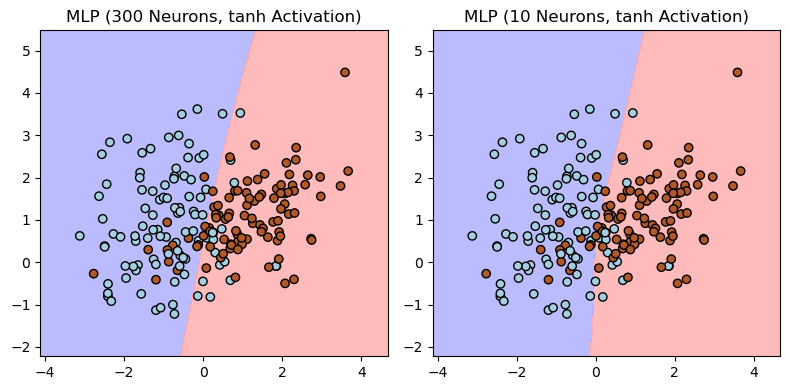

In [66]:
# Train MLP models with one hidden layer and tanh activation function
models = [
    MLPClassifier(hidden_layer_sizes=(300,), activation="tanh", max_iter=2000, random_state=42),  # 300 neurons
    MLPClassifier(hidden_layer_sizes=(10,), activation="tanh", max_iter=2000, random_state=42),  # 10 neurons
]

titles = [
    "MLP (300 Neurons, tanh Activation)",
    "MLP (10 Neurons, tanh Activation)",
]

# Generate decision boundaries
boundaries = []
for model in models:
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    boundaries.append((Z, model))

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, (ax, (Z, model), title) in enumerate(zip(axes, boundaries, titles)):
    # Fill the regions
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["#AAAAFF", "#FFAAAA"]))
    # Scatter plot of data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()
